## **Allan Deviation Plot Interpretation**

- **Flat Region**: White frequency noise (uncorrelated fluctuations, e.g., shot noise).
- **Downward Slope (-1/2)**: Averaging reduces noise, indicating flicker phase noise or thermal drift.
- **Upward Slope (+1/2 or more)**: Frequency drift (random walk behavior or systematic long-term drift).
- **Dip at Some \( \tau \)**: Optimal averaging time before noise starts accumulating.


In [1]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas
import allantools

# Overnight data

Text(0, 0.5, 'power (W)')

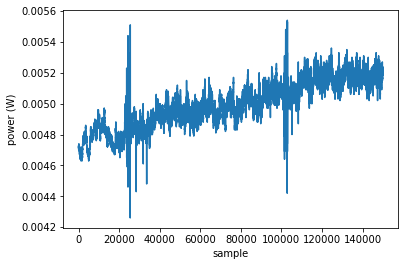

In [2]:
power_time_series = pandas.read_csv("Data_overnight.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")

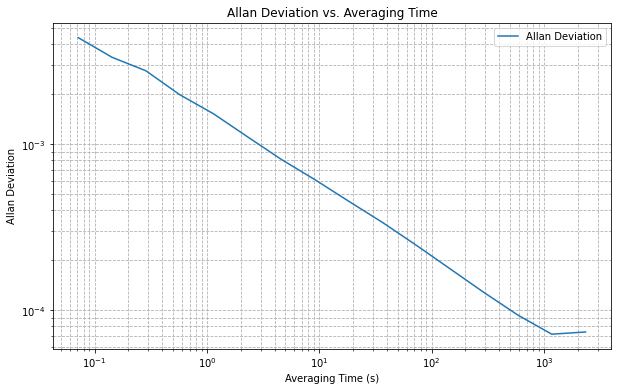

In [3]:
# Parameters
N = len(power_time_series)          # number of data points
time = 10735.5
dt = time/N          # time step in seconds
time1 = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)
psd = psd/time

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos = freqs[mask]
psd_pos = psd[mask]


freq_fluctuations = psd_pos  # Simulated frequency noise

# Compute Allan variance
taus1, allan_var1, _, _ = allantools.oadev(freq_fluctuations, rate=1/dt, data_type="freq")

# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus1, np.sqrt(allan_var1), label="Allan Deviation")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()



# Afternoon data

Text(0, 0.5, 'power (W)')

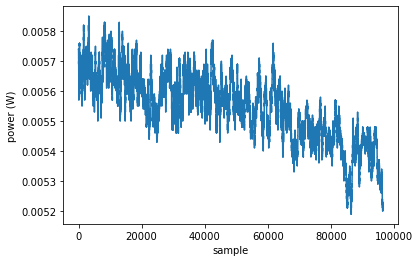

In [4]:
power_time_series = pandas.read_csv("Data_afternoon.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")

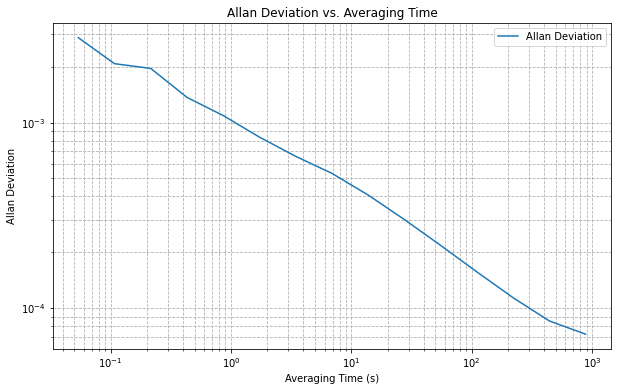

In [5]:
# Parameters
N = len(power_time_series)          # number of data points
time = 5201.739
dt = time/N          # time step in seconds
time2 = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)
psd = psd/time

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos = freqs[mask]
psd_pos = psd[mask]


freq_fluctuations = psd_pos  # Simulated frequency noise

# Compute Allan variance
taus2, allan_var2, _, _ = allantools.oadev(freq_fluctuations, rate=1/dt, data_type="freq")

# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus2, np.sqrt(allan_var2), label="Allan Deviation")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()



# plot together

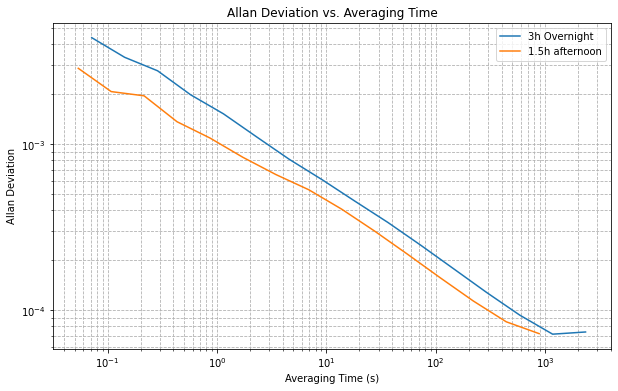

In [6]:
# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus1, np.sqrt(allan_var1), label="3h Overnight")
plt.loglog(taus2, np.sqrt(allan_var2), label="1.5h afternoon")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# with NE

Text(0, 0.5, 'power (W)')

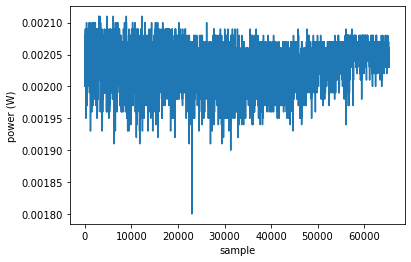

In [7]:
power_time_series = pandas.read_csv("Data_NE.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")

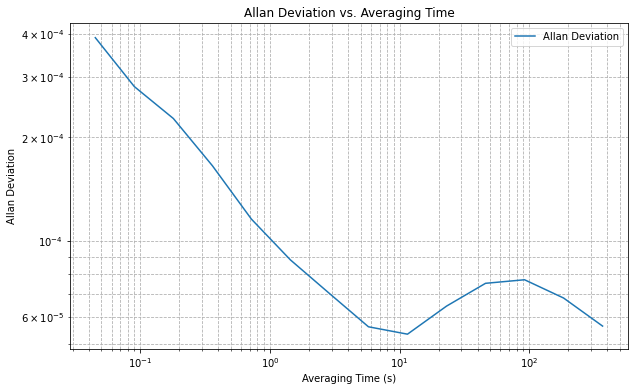

In [8]:
# Parameters
N = len(power_time_series)          # number of data points
time = 2937.414
dt = time/N          # time step in seconds
time3 = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)
psd = psd/time

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos = freqs[mask]
psd_pos = psd[mask]


freq_fluctuations = psd_pos  # Simulated frequency noise

# Compute Allan variance
taus3, allan_var3, _, _ = allantools.oadev(freq_fluctuations, rate=1/dt, data_type="freq")

# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus3, np.sqrt(allan_var3), label="Allan Deviation")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()



# compare

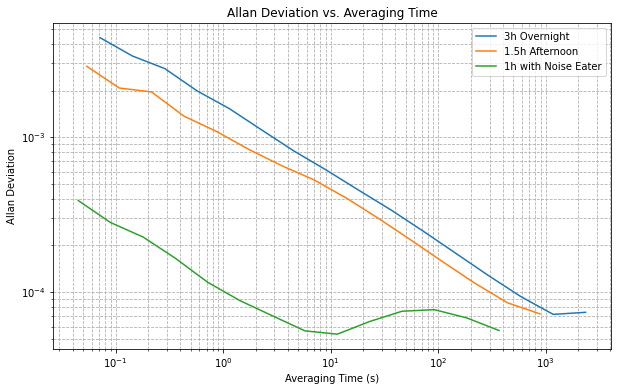

In [9]:
# Plot Allan deviation
plt.figure(figsize=(10, 6))
plt.loglog(taus1, np.sqrt(allan_var1), label="3h Overnight")
plt.loglog(taus2, np.sqrt(allan_var2), label="1.5h Afternoon")
plt.loglog(taus3, np.sqrt(allan_var3), label="1h with Noise Eater")
plt.xlabel("Averaging Time (s)")
plt.ylabel("Allan Deviation")
plt.title("Allan Deviation vs. Averaging Time")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()